# №1

In [1]:
from random import uniform
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def generate(min_x, max_x, min_y, max_y, N, P):
    # points to define line
    line_x1 = uniform(min_x, max_x)
    line_y1 = min_y
    line_x2 = uniform(min_x, max_x)
    line_y2 = max_y
    
    sample = []
    
    for x in range(0, P):
        x_coord = uniform(min_x, max(line_x1, line_x2))
        y_on_line = line_y1 + (x_coord - line_x1)/(line_x2 - line_x1)*(line_y2 - line_y1)
        if x_coord < min(line_x1, line_x2):
            y_coord = uniform(min_y, max_y)
        elif line_x1 < line_x2:
            y_coord = uniform(y_on_line, max_y)
        else:
            y_coord = uniform(min_y, y_on_line)
        sample.append((x_coord, y_coord, 1))
         
    for x in range(0, N):
        x_coord = uniform(min(line_x1, line_x2) ,max_x)
        y_on_line = line_y1 + (x_coord - line_x1)/(line_x2 - line_x1)*(line_y2 - line_y1)
        if x_coord > max(line_x1, line_x2):
            y_coord = uniform(min_y, max_y)
        elif line_x1 < line_x2:
            y_coord = uniform(min_y, y_on_line)
        else:
            y_coord = uniform(y_on_line, max_y)
        sample.append((x_coord, y_coord, -1))
    return sample

# №2

In [ ]:
def batch_perceptron(sample):
    w = np.zeros(3)
    x = [ [1,el[0],el[1]] for el in sample]
    y = [ el[2] for el in sample]
    len_s = len(sample)
    iter = 0
    while True:
        for i in range(0,len_s):
            flag = True
            if (y[i]*np.dot(w,x[i]) <= 0):
                w = w + np.dot(y[i],x[i])
                flag = False
                break
        if flag:
            break
        iter+=1
    indent = [ely*np.dot(w,elx) for elx,ely in zip(x,y)]
    min_indent = min(indent)
    return w, min_indent, iter

In [ ]:
min_x = min_y = -10
max_x = max_y =1
# среднее количество шагов 
average_stat_list = []
for k in xrange(1,45):
    # от 1 до 45 точек в каждом классе
    stat_list = []
    steps = 0
    # по 10 итерациям
    for i in xrange(0,10):    
        N = P = k
        l = generate(min_x, max_x, min_y, max_y, N, P)
        stats = batch_perceptron(l)
        steps += stats[2]
    steps /= 50.
    average_stat_list.append((k,steps))

# Визуализация линейно разделимой выборки

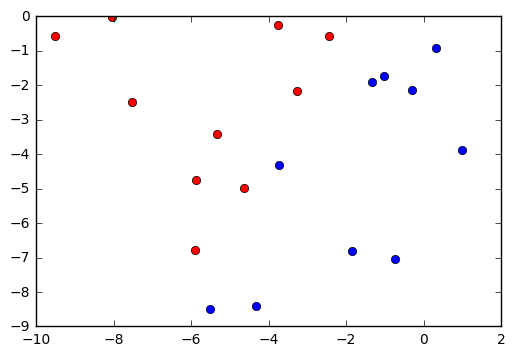

In [11]:
N = P = k = 10
min_x = min_y = -10
max_x = max_y =1

l = generate(min_x, max_x, min_y, max_y, N, P)
list_pos = [i for i in l if i[2]==1]
list_neg = [i for i in l if i[2]==-1]
zipped_pos = zip(*list_pos)
x_pos = zipped_pos[0]
y_pos = zipped_pos[1]
zipped_neg = zip(*list_neg)
x_neg = zipped_neg[0]
y_neg = zipped_neg[1]
plt.plot(x_pos, y_pos,'ro')
plt.plot(x_neg, y_neg, 'bo')


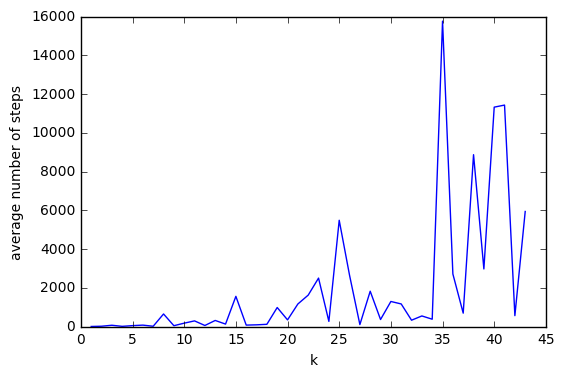

In [19]:
x = [elem[0] for elem in average_stat_list]
y = [elem[1] for elem in average_stat_list]
plt.plot(x,y)
plt.xlabel('k')
plt.ylabel('average number of steps')

# №4

## Ridge Regression

In [139]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog as lp

def read_data(file_path):
    with open(file_path,'r') as file:
        file.next()
        X = []
        y = []
        for line in file:
            splitted = line.split(',')
            l = map(float,splitted)
            X.append(l[:4])
            y.append(l[4:])
        X = np.matrix(X)
        y = np.matrix(y)
        return (X,y)
#Ridge Regression
def solve_svd(X, y, tau):
    U, D1, V = np.linalg.svd(X, full_matrices=False)
    D = np.zeros((4, 4))
    for idx in range(0, 4):
        D[idx, idx] = D1[idx] / (D1[idx]**2 + tau)
    product_VD = np.dot(V.transpose(), D)
    product_VDU = np.dot(product_VD, U.transpose())
    product_VDUy = np.dot(product_VDU, y)
    return product_VDUy

def calculate_MSE(X, weight_vector, output_vector):
    size = output_vector.shape[0]
    difference = np.array(np.dot(X, weight_vector) - output_vector).reshape(-1)
    square = [i**2 for i in difference]
    return np.sum(square) / size


In [140]:
X, y  = read_data('basketball.csv')

solution = solve_svd(X, y, 0.0)
print("Weights for tau = 0: ", solution)
print("Approximate solution:", np.dot(X, solution).transpose())
print("True solution:",y.transpose())
print("MSE:", calculate_MSE(X, solution, y))

('Weights for tau = 0: ', matrix([[ -3.04634035e+00],
        [  4.47411947e-03],
        [  4.82210324e+01],
        [  1.24703504e+01]]))
('Approximate solution:', matrix([[  9.98533429,  12.52841566,  12.83223189,  10.09617892,
          12.77200499,  12.02023692,  14.73405083,  12.30473069,
          11.20856538,  13.96321938,  12.83972502,  13.28943508,
           8.51191245,  12.44256772,  12.84802818,  15.49827955,
          15.70974808,   5.46899906,   9.81342983,  12.6520027 ,
           9.11979352,  10.34902599,   7.39074273,  10.05332065,
          15.04207671,  12.059035  ,  13.91855966,   8.82489468,
          11.12575365,  14.22795374,  15.40708524,  10.15759099,
          13.39458403,  10.34902599,   8.85597407,  14.62377614,
          14.89789368,  13.05254531,   7.24800186,   6.54324778,
           9.29364849,   5.56893862,  13.684919  ,  16.4417421 ,
          12.15107187,  10.2703491 ,  17.53494729,   9.17909114,
           9.13258281,  14.5046518 ,  16.30662832,  12

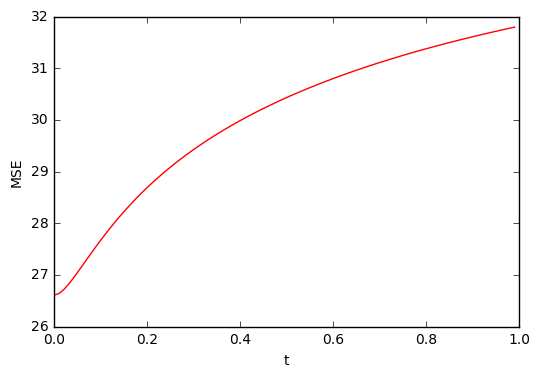

In [85]:
t_array = []
mse_array = []
for t in np.arange(0.0, 1.0, 0.01):
    solution = solve_svd(X, y, t)
    mse = calculate_MSE(X, solution, y)
    t_array.append(t)
    mse_array.append(mse)
      
plt.plot(t_array, mse_array, 'r') 
plt.xlabel('t')
plt.ylabel('MSE')
plt.show()

## LAD Regression

In [133]:
def create_condition_matrix(matrix):
    dimension = matrix.shape[1] 
    size = matrix.shape[0]
    
    weight_matrix = np.matrix(matrix)
    identity = np.identity(size)
    
    first = np.concatenate((weight_matrix, -identity ), axis = 1)
    second  = np.concatenate((-weight_matrix, -identity ), axis = 1)
    result = np.concatenate((first, second), axis = 0)
    return result

# LAD regression
def solve_linear(matrix, vector, tolerance):

    dimension = matrix.shape[1] # real parameters
    size = matrix.shape[0] # fake "a" parameters
    
    # the coefficients of the function to minimize
    linear_coefficients = dimension*[0] + size*[1]
    # bounds for coefficients
    weight_bounds = (None, None)
    a_bounds = (0.0, None)
    parameters_bounds = dimension*[weight_bounds] + size*[a_bounds]
    
    conditions_bounds = np.concatenate((np.array(vector), -np.array(vector)))
    conditions_matrix = create_condition_matrix(matrix).tolist()
    solution = lp(linear_coefficients, A_ub=conditions_matrix, b_ub=conditions_bounds, bounds=parameters_bounds,
             options={"disp": True, "bland": True, "tol": tolerance})
    return solution.x[:dimension]

X, y  = read_data('basketball.csv')
solution = solve_linear(X, y.transpose(), 0.001)

print("Weights:", solution)
print("Approximate solution:", np.dot(X, solution))

Optimization terminated successfully.
         Current function value: 208.953912  
         Iterations: 138
('Weights:', array([ -2.83245223e+00,   1.05564300e-02,   3.07481879e+01,
         1.76187408e+01]))
('Approximate solution:', matrix([[  8.54501445,  11.47330651,  11.30706286,   8.6       ,
          12.28295085,  11.24258929,  12.66690717,  10.85504161,
          10.72443237,  12.53401171,  10.04351411,  11.53864838,
           8.1       ,  11.49006792,  11.55342856,  14.03256986,
          13.77975753,   3.97684065,  10.15687145,  10.5       ,
           8.89213346,   8.4603416 ,   2.99351803,   9.20675361,
          11.925672  ,  10.77536508,  11.91753771,   8.33719612,
           9.94485897,  12.27103568,  13.87710405,   9.4553227 ,
          12.26904263,   8.4603416 ,   9.54156888,  12.24862152,
          13.6       ,  12.25309555,   6.00471451,   5.36921069,
           8.20411419,   6.32895091,  12.52148615,  13.82168927,
          10.52106879,  10.21767998,  14.77604725